This notebook shows a simulation of a Leaky Integrate and Fire network, made of two layers, an input layer and a hidden layer, no learning or weight adaptation is done so far. <br/>

The input layer shows the dynamics of a LIF neuron, to which a time dependent external current is applied. The values of the current are generated randomly for each time step. <br/>

The hidden layer neurons have the same fundamental behaviour of a LIF neuron, but they aren't affected by external currents and they have no refractory period, while the input neurons have varying refractory periods assigned.<br/>

The two layers are then connected through synapses, the layers are fully connected in this simulation.

In [21]:
from brian2 import *
%matplotlib inline

start_scope()

v_rest = 0*mV
v_thr = 10*mV
tau_m = 10*ms
In_cur = TimedArray((10 + 5*randn(2000))*mV,dt=0.1*ms)

Define the set of equations that describe the behaviour of input neurons. They have the dynamics of LIF neurons but get a time varying input current applied to them. Additionally, the refractory period of the neurons is defined as a state variable of the behaviour so that it can be varied for each neuron in the input layer.

In [22]:
eqs_input = '''
dv/dt = -(v-v_rest-I)/tau_m : volt (unless refractory)
I = In_cur(t) : volt
ref : second
'''

In [23]:
In = NeuronGroup(2, model=eqs_input, threshold='v>v_thr',reset='v=v_rest', refractory='ref')
In.v = [5*mV, 2*mV]
In.ref = [4*ms, 0*ms]

Define the equations that model the behaviour of hidden layer neurons, for simplicity they have no refractory period specified.

In [24]:
eqs_hidd = '''
dv/dt = -(v-v_rest-I)/tau_m : volt (unless refractory)
I : volt
'''

In [25]:
Hidd = NeuronGroup(2, model=eqs_hidd, threshold='v>v_thr', reset='v=v_rest', refractory=0*ms)
Hidd.v = [0*mV]
Hidd.I = [0*mV]

Define the equations that show the dynamics of the synapses connecting the input and hidden layers. For now each synapse just has a weight associated.

In [26]:
synapse_eq = '''
w:1
''' 

In [27]:
S = Synapses(In, Hidd, synapse_eq, on_pre='v_post+=v_pre*w')
S.connect()
S.w = [50, 10 , 1, 1]

Initialise the weights. The equation for synapses would be where we define how and when the connection strengths between neurons are changed based on spikes that occur in the network. <br/>
__S.connect()__ with no further specification of how the connections should be made will connect all neurons fron the source domain __In__ to every neuron from the target domain __Hidd__.<br/>
Then we can just specify values for the weights created. To be noted that the order in which the weights are stored in the array is: __i0-h0, i0-h1, i1-h0, i1-h1__.<br/>
__on_pre__ can also take a set of equations to describe what happens when a presynaptic spike occurs.

INFO       No numerical integration method specified for group 'neurongroup_1', using method 'linear' (took 0.03s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'neurongroup', using method 'linear' (took 0.03s). [brian2.stateupdaters.base.method_choice]


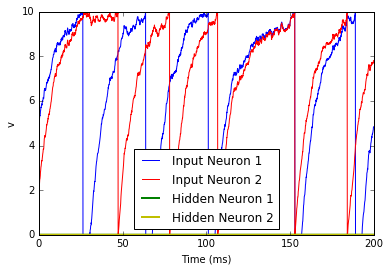

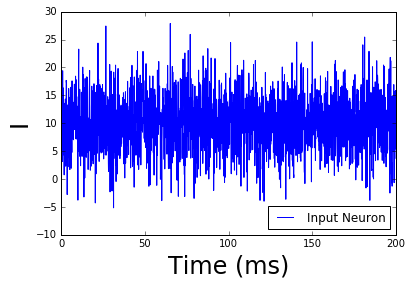

In [28]:
trace_In = StateMonitor(In, ['v','I'], record=True)
trace_Hidd = StateMonitor(Hidd, 'v', record=True)

run(200*ms)

figure(1)
plot(trace_In.t/ms, trace_In.v[0]/mV, '-b', label='Input Neuron 1')
plot(trace_In.t/ms, trace_In.v[1]/mV, '-r', label='Input Neuron 2')
plot(trace_Hidd.t/ms, trace_Hidd.v[0]/mV, '-g', lw=2, label='Hidden Neuron 1')
plot(trace_Hidd.t/ms, trace_Hidd.v[1]/mV, '-y', lw=2, label='Hidden Neuron 2')
xlabel('Time (ms)')
ylabel('v')
legend(loc='best')

figure(2)
plot(trace_In.t/ms, trace_In.I[0]/mV, '-b', label='Input Neuron')
xlabel('Time (ms)', fontsize=24)
ylabel('I', fontsize=24)
legend(loc='best')

show()